In [6]:
import pandas as pd
import numpy as np

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('titanic.csv')
#sibsp = siblings or spouse
#parch = parents or children

In [3]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


In [5]:
#clean up!
data.replace('?', np.nan, inplace= True)
#update column data type
data = data.astype({"age": np.float64, "fare": np.float64})

<AxesSubplot:xlabel='survived', ylabel='fare'>

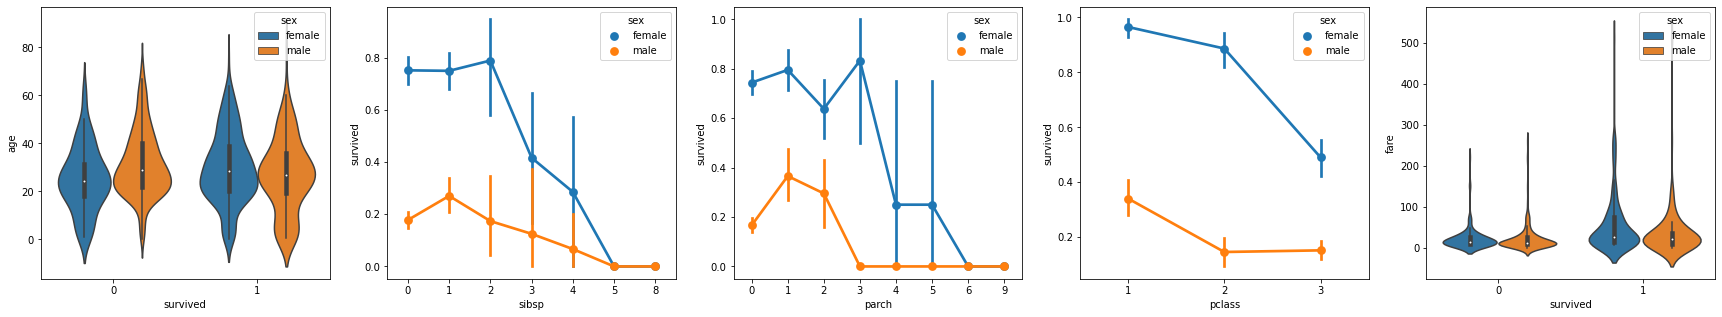

In [11]:
#create a new figure (fig) and axis (axs) to display graphs
fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])

In [12]:
#there could be a relationship
#more data clean up
data.replace({'male': 1, 'female': 0}, inplace=True)
#changing data in the dataframe

In [13]:
#calculating the correlation
data.corr().abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265


In [14]:
#create a new column in the data called relatives
data['relatives'] = data.apply (lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)
#calculate the correlation again
data.corr().abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265
relatives,0.201719


In [15]:
#more cleanup!
#drop 'na' data
data = data[['sex', 'pclass','age','relatives','fare','survived']].dropna()

In [16]:
#train and evaluate model
from sklearn.model_selection import train_test_split
#split the dataset intro training and validation data
#we split the dataset as a way to estimate how well it would actually perform against data the model has not yet seen
x_train, x_test, y_train, y_test = train_test_split(data[['sex','pclass','age','relatives','fare']], data.survived, test_size=0.2, random_state=0)

In [17]:
#normalise the inputs
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [18]:
#using Naïve Bayes algorithm
#used for classification problems
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [19]:
from sklearn import metrics
predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))
#this shows a 75% success rate of estimating survival!

0.7464114832535885


In [23]:
#taking the dataframe (data) and exporting it to a CSV file to be used in Tableau
data.to_csv('out.csv', index=False)